In [47]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
from pandas.api.types import CategoricalDtype

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

In [48]:
# Font veranderen. 
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [49]:
base_path = '../processed_data/load_testing'
scenarios = ['1_register_fake_data', '3_login', '2_register_and_create_transaction', '4_login_and_get_transactions']

# Human readable titles for the scenarios.  
titles = {
    '1_register_fake_data': 'Registreren',
    '2_register_and_create_transaction': 'Transactie aanmaken',
    '3_login': 'Inloggen',
    '4_login_and_get_transactions': 'Alle transacties ophalen',
}


Calculate mean and standard deviation.

In [50]:
for scenario in scenarios: 
    before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{scenario}.csv', delimiter=',', header=0, index_col=0)
    after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{scenario}.csv', delimiter=',', header=0, index_col=0)

    before_mean = before['mean'].mean()
    before_std = before['mean'].std()

    after_mean = after['mean'].mean()
    after_std = after['mean'].std()

    print(scenario)
    print(f'before: mean={before_mean:.2f} std={before_std:.2f}')
    print(f'after: mean={after_mean:.2f} std={after_std:.2f}')
    print()


1_register_fake_data
before: mean=3930.56 std=3215.05
after: mean=3748.58 std=3019.13

3_login
before: mean=3506.42 std=2889.77
after: mean=3484.47 std=2765.13

2_register_and_create_transaction
before: mean=9.73 std=3.15
after: mean=11.51 std=1.45

4_login_and_get_transactions
before: mean=64.58 std=12.17
after: mean=61.88 std=5.97



Visualize results with boxplot.

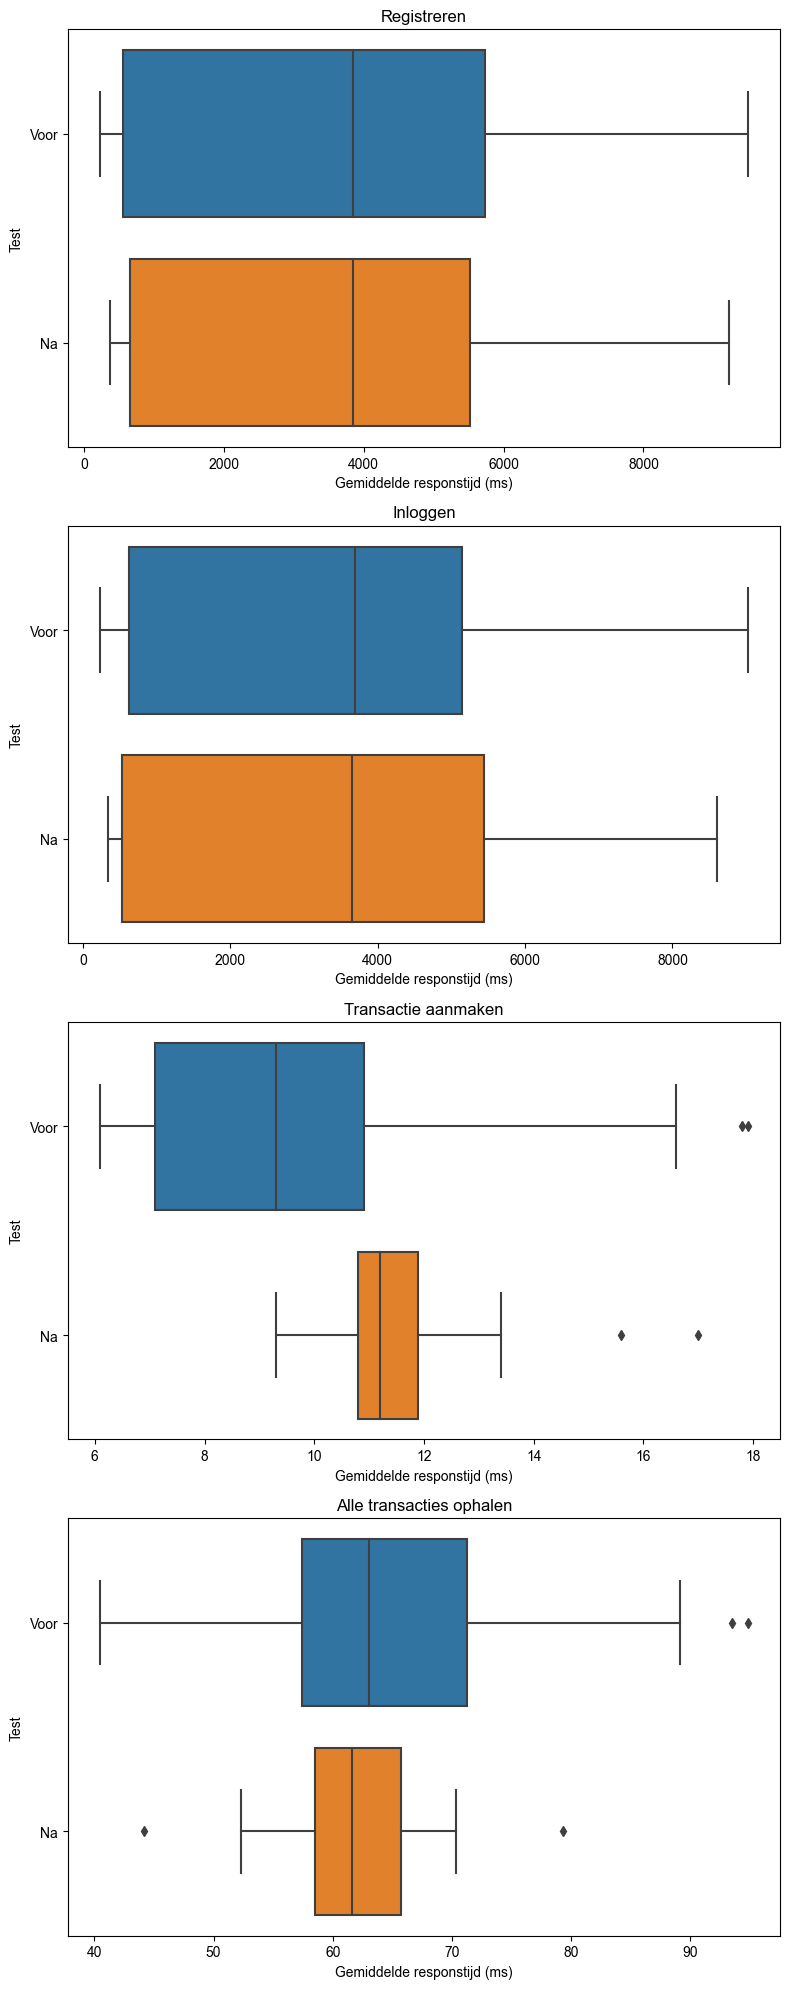

In [51]:
figure, axes = plt.subplots(len(scenarios), 1, figsize=(8, 5*len(scenarios)))

for ax, scenario in zip(axes, scenarios):
    before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{scenario}.csv', delimiter=',', header=0, index_col=0)
    after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{scenario}.csv', delimiter=',', header=0, index_col=0)

    before['source'] = 'Voor'
    after['source'] = 'Na'

    data = pd.concat([before, after])

    sns.boxplot(data=data, x='mean', y='source', ax=ax)

    ax.set_title(titles[scenario])
    ax.set_xlabel('Gemiddelde responstijd (ms)')
    ax.set_ylabel('Test')

plt.tight_layout()
plt.show()

Visualize results with histogram. 

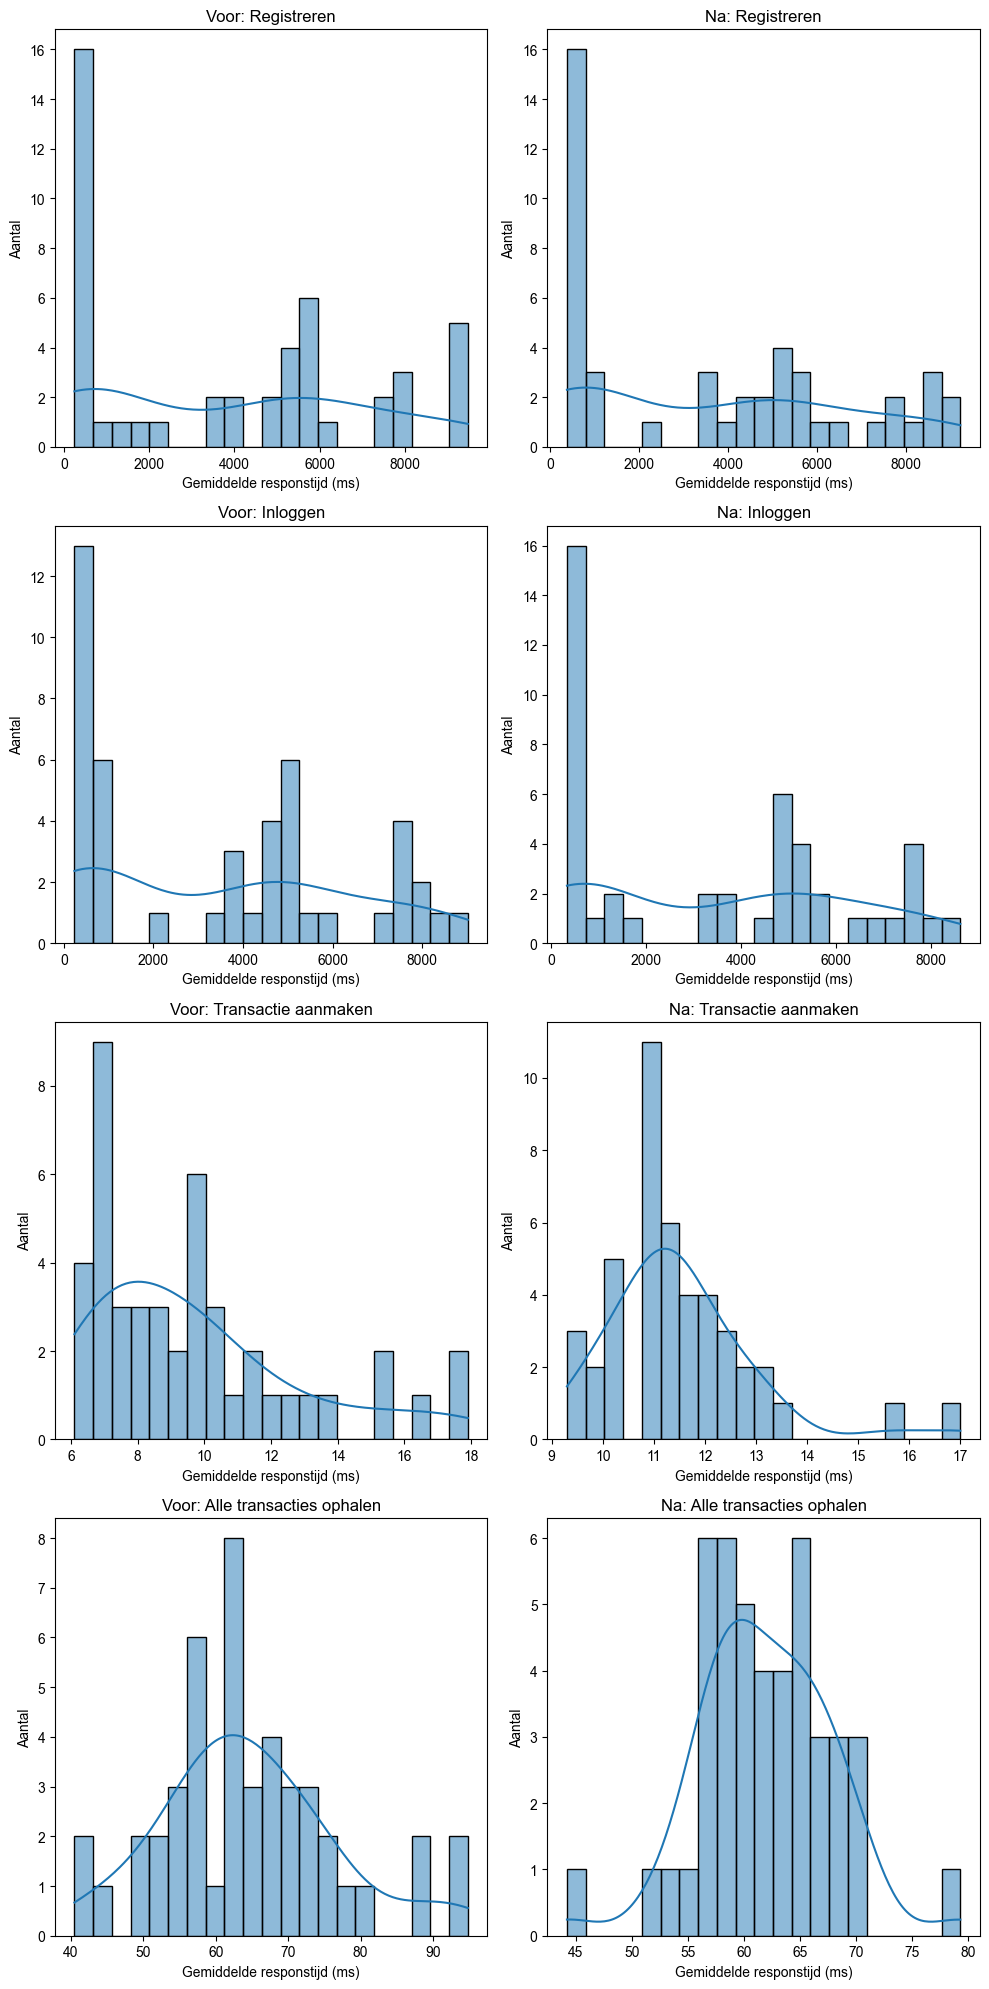

In [52]:
figure, axes = plt.subplots(len(scenarios), 2, figsize=(10, 5*len(scenarios)))

for ax, scenario in zip(axes, scenarios):
    # Before. 
    before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{scenario}.csv', delimiter=',', header=0, index_col=0)

    sns.histplot(data=before, x="mean",  bins=21, kde=True, ax=ax[0])
    ax[0].set_title(f'Voor: {titles[scenario]}')

    ax[0].set_xlabel('Gemiddelde responstijd (ms)')
    ax[0].set_ylabel('Aantal')

    # After.
    after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{scenario}.csv', delimiter=',', header=0, index_col=0)

    sns.histplot(data=after, x="mean",  bins=21, kde=True, ax=ax[1])
    ax[1].set_title(f'Na: {titles[scenario]}')

    ax[1].set_xlabel('Gemiddelde responstijd (ms)')
    ax[1].set_ylabel('Aantal')

plt.tight_layout()
plt.show()



